### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_style("whitegrid")
%matplotlib inline 

### Loading the datasets

In [2]:
with open("data/train.json") as datafile1:
    train = json.load(datafile1)
with open("data/test.json") as datafile2:
    test = json.load(datafile2)
with open("data/validation.json") as datafile3:
    valid = json.load(datafile3)

### Conversion to Pandas dataframes

In [3]:
def joinFn(dat):
    return [dat[0]["url"][0], dat[1]["label_id"]]

trainDF = pd.DataFrame(list(map(joinFn, zip(train["images"],train["annotations"]))),columns=["url","label"])
validDF = pd.DataFrame(list(map(joinFn, zip(valid["images"],valid["annotations"]))),columns=["url","label"])
testDF = pd.DataFrame(list(map(lambda x: x["url"],test["images"])),columns=["url"])

In [4]:
trainDF.head()

,url,label
0,https://img13.360buyimg.com/imgzone/jfs/t2857/...,5
1,http://www.tengdakeli.cn/350/timg01/uploaded/i...,5
2,https://img13.360buyimg.com/imgzone/jfs/t8899/...,5
3,http://img4.tbcdn.cn/tfscom/i1/2855447419/TB2S...,5
4,http://a.vpimg4.com/upload/merchandise/287883/...,5


In [5]:
print("Number of classes: {0}".format(len( trainDF["label"].unique())))

Number of classes: 128


### Distribution of class labels

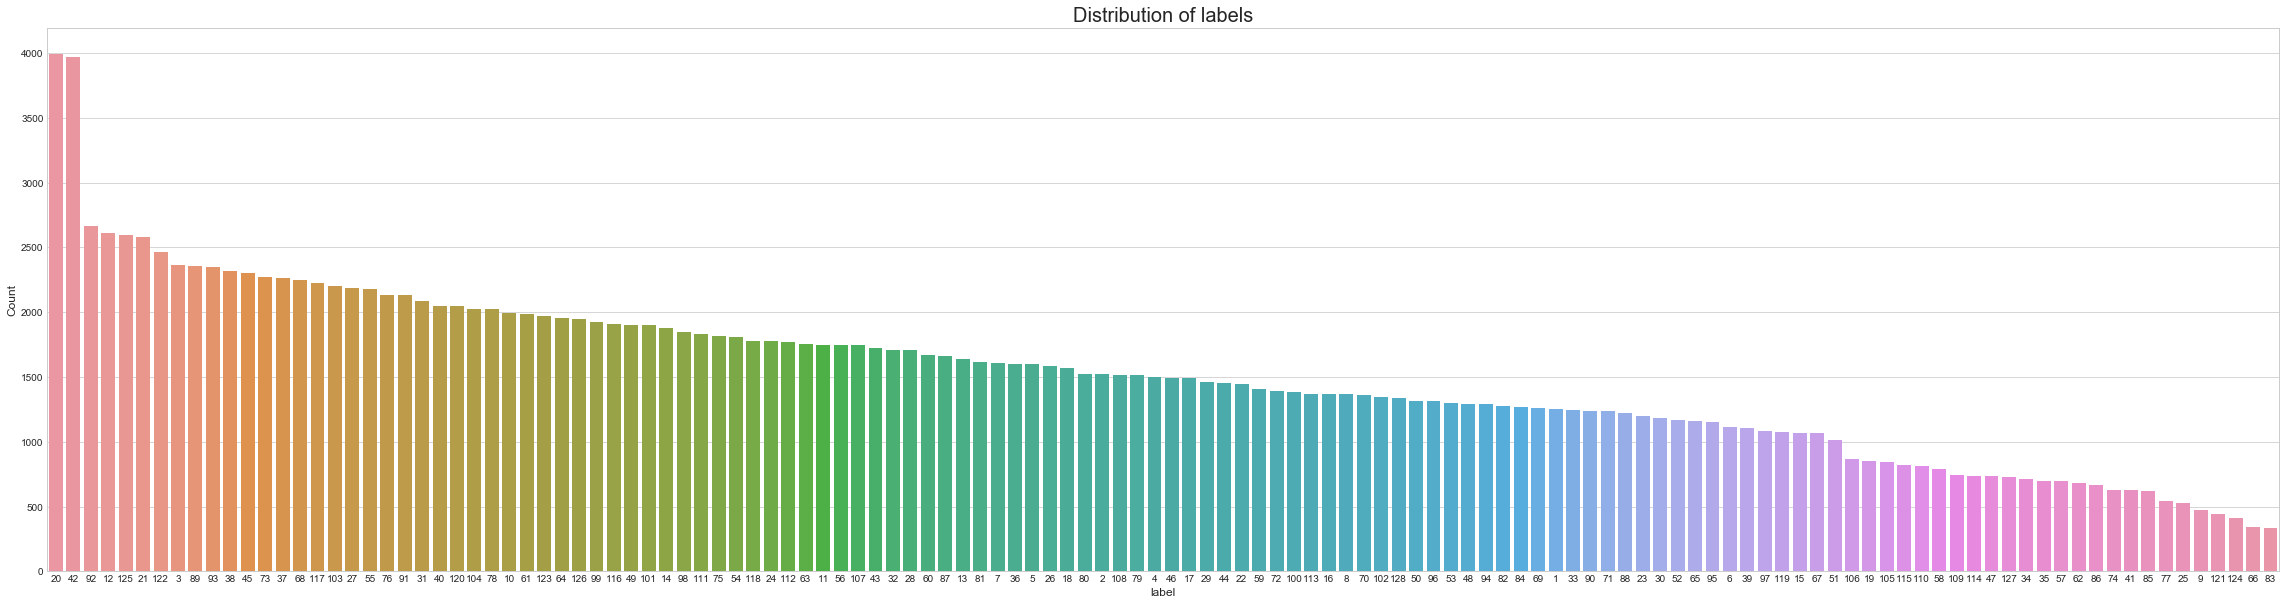

In [6]:
plt.figure();
plt.figure(figsize=(40,10));
count = trainDF['label'].value_counts();
sns.barplot(count.index,  count.values, order=trainDF['label'].value_counts().index);
plt.xlabel('label', fontsize=12);
plt.ylabel('Count', fontsize=12);
plt.title("Distribution of labels", fontsize=20);
plt.savefig('label_distribution.png');

From the distribution of the labels, it can be observed that the distribution is skewed. This will pose a challenge to the machine learning model since it will try to become biased towards the class with more examples. To tackle this challenge, data augmentation would be extremely useful. Techniques such as flipping the original images, varying their sizes, varying the brigntness of the images, etc. could be helpful in creating a balanced dataset.

In [7]:
from IPython.core.display import HTML 
from ipywidgets import interact
from IPython.display import display

In [8]:
def displayExamples(exampleIndex=0):
    outHTML = "<div>"
    for label in range(1,129):
        img_style = "width: 180px;height:180px; margin: 0px; float: left; border: 1px solid black;"
        captionDiv = "<div style='position:absolute;right:30px;color:black;font-size:30px;background-color:white;padding:5px;opacity:0.8'>"+str(label)+"</div>"
        outHTML += "<div style='position:relative;display:inline-block'><img style='"+img_style+"' src='"+trainDF[trainDF.label == label].iloc[exampleIndex][0]+"'/>"+captionDiv+"</div>"
    outHTML += "</div>"
    display(HTML(outHTML))

displayExamples()

## Variation of images within a category

In [9]:
def displayExamples(category=1):
    outHTML = "<div>"
    for i in range(1,21):
        img_style = "width: 180px;height:180px; margin: 0px; float: left; border: 1px solid black;"
        captionDiv = "<div style='position:absolute;right:30px;color:black;font-size:30px;background-color:white;padding:5px;opacity:0.8'>"+str(category)+"</div>"
        outHTML += "<div style='position:relative;display:inline-block'><img style='"+img_style+"' src='"+trainDF[trainDF.label == category].iloc[i][0]+"'/>"+captionDiv+"</div>"
    outHTML += "</div>"
    display(HTML(outHTML))

displayExamples(8)

In [10]:
displayExamples(42)

Many of the training images contain surroundings in addition to the subject under consideration. The variation in surroundings and background makes it very challenging to recognize products from images.